# Apple Stock Price Prediction using Prophet

## 1. Installation

In [7]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


## 2. Data Loading and Preparation

In [70]:

import pandas as pd

# Load the updated data
df = pd.read_excel("Updated_AAPL_with_Events.xlsx")

# Prepare the data for Prophet
train_data = df[df["Date"] < "2023-08-18"]
train_df = train_data[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Define the events
event_dates = {
    "SteveJobsLeaves": "1985-09-16",
    "SteveJobsReturns": "1997-07-09",
    "BlackBerryLaunch": "1999-01-19",
    "iPhoneLaunch": "2007-06-29",
    "iPadLaunch": "2010-04-03",
    "SamsungGalaxySLaunch": "2010-06-04"
}

additional_events = {
    "AppleWatchLaunch": "2015-04-24",
    "AppStoreIntroduction": "2008-07-10",
    "AndroidIntroduction": "2008-09-23",
    "WindowsMobile6_5": "2009-10-06",
    "AppleFBIControversy": "2016-02-01",
    "AppleSamsungLawsuit": "2012-08-24",
    "StockSplitAnnouncement": "2014-06-09",
    "BatterygateControversy": "2017-12-01",
    "BeatsAcquisition": "2014-05-28",
    "USChinaTradeTensions": "2018-01-01",
    "JonyIveResignation": "2019-06-27",
    "COVID19Impact": "2020-02-01"
}

all_events = {**event_dates, **additional_events}
for event in all_events:
    train_df[event] = df[event]


In [58]:
# Plot the data
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [59]:
# SHow first 5 rows of the dataset
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SteveJobsLeaves,SteveJobsReturns,BlackBerryLaunch,iPhoneLaunch,iPadLaunch,SamsungGalaxySLaunch,AppleWatchLaunch,AppStoreIntroduction,AndroidIntroduction,WindowsMobile6_5,AppleFBIControversy,AppleSamsungLawsuit,StockSplitAnnouncement,BatterygateControversy,BeatsAcquisition,USChinaTradeTensions,JonyIveResignation,COVID19Impact
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# SHow the Last 5 rows of the data
apple_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SteveJobsLeaves,SteveJobsReturns,BlackBerryLaunch,iPhoneLaunch,iPadLaunch,SamsungGalaxySLaunch,AppleWatchLaunch,AppStoreIntroduction,AndroidIntroduction,WindowsMobile6_5,AppleFBIControversy,AppleSamsungLawsuit,StockSplitAnnouncement,BatterygateControversy,BeatsAcquisition,USChinaTradeTensions,JonyIveResignation,COVID19Impact
10756,2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10757,2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10758,2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10759,2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10760,2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# Check if there are any duplicates
apple_data.index.is_unique

True

In [62]:
# Check if there are any null values
apple_data.isnull().sum()

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
SteveJobsLeaves           0
SteveJobsReturns          0
BlackBerryLaunch          0
iPhoneLaunch              0
iPadLaunch                0
SamsungGalaxySLaunch      0
AppleWatchLaunch          0
AppStoreIntroduction      0
AndroidIntroduction       0
WindowsMobile6_5          0
AppleFBIControversy       0
AppleSamsungLawsuit       0
StockSplitAnnouncement    0
BatterygateControversy    0
BeatsAcquisition          0
USChinaTradeTensions      0
JonyIveResignation        0
COVID19Impact             0
dtype: int64

## 3. Modeling with Prophet

In [71]:

from prophet import Prophet

# Initialize the Prophet model
model = Prophet(daily_seasonality=True)

# Add all the external events to the model
for event in all_events:
    model.add_regressor(event)

# Train the model
model.fit(train_df)

# Predict for future dates
future_dates = model.make_future_dataframe(periods=len(apple_data) - len(train_data))
for event in all_events:
    future_dates[event] = apple_data[event]

forecast = model.predict(future_dates)


00:38:17 - cmdstanpy - INFO - Chain [1] start processing
00:38:22 - cmdstanpy - INFO - Chain [1] done processing


## 4. Evaluation

In [76]:

from sklearn.metrics import mean_absolute_error

test_forecast = forecast.tail(len(apple_data) - len(train_data))["yhat"].values
actual_values = apple_data[apple_data["Date"] >= "2023-08-18"]["Close"].values

mae = mean_absolute_error(actual_values, test_forecast)
print(f"Mean Absolute Error (MAE): {mae: .2f}")

def calculate_mape(actual, forecasted):
    return (abs((actual - forecasted) / actual).mean()) * 100

mape = calculate_mape(actual_values, test_forecast)
print(f"Mean Absolute Percentage Error (MAPE): {mape: .2f}%")


Mean Absolute Error (MAE):  11.21
Mean Absolute Percentage Error (MAPE):  6.42%


## 5. Visualization

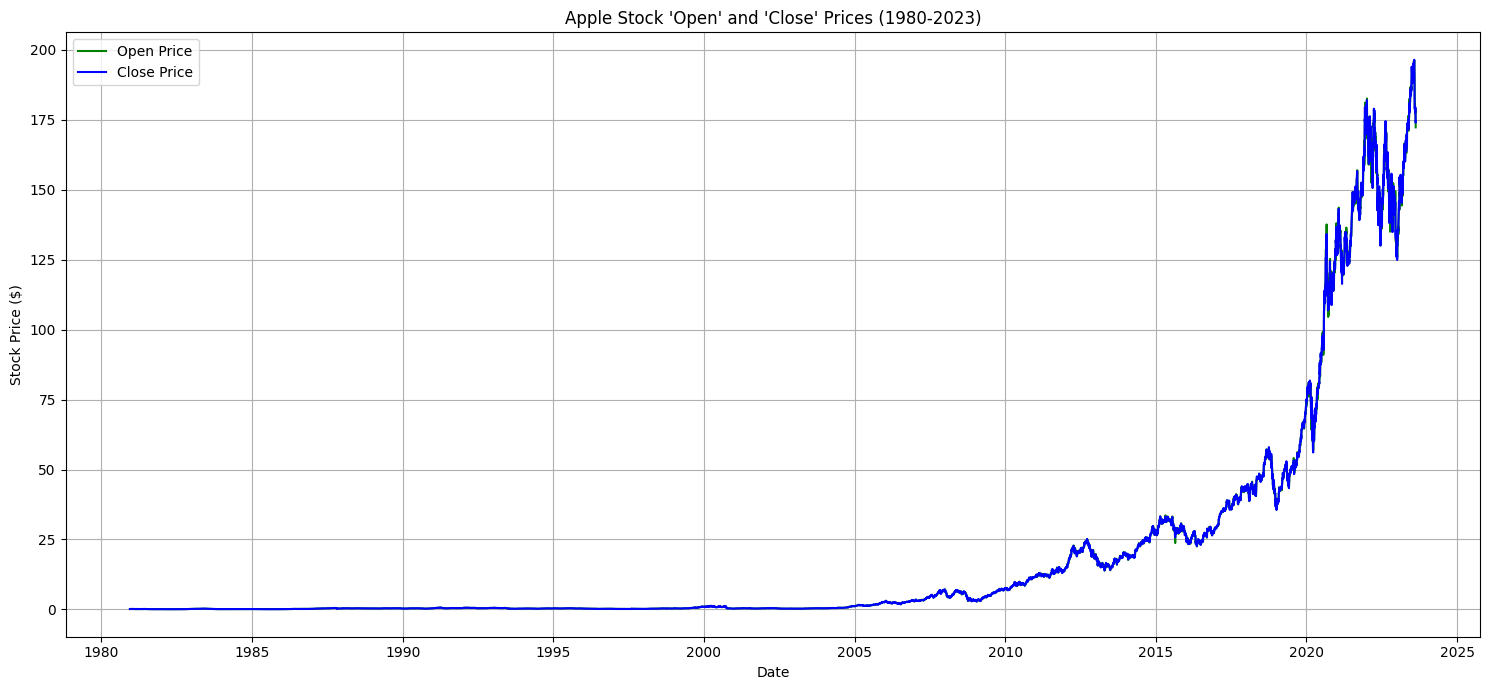

In [77]:
import matplotlib.pyplot as plt

# Plotting the daily time series for 'Open' and 'Close' prices of Apple stock from 1980 to 2023
plt.figure(figsize=(15, 7))

# Plot 'Open' price
plt.plot(apple_data["Date"], apple_data["Open"], label="Open Price", color='green')

# Plot 'Close' price
plt.plot(apple_data["Date"], apple_data["Close"], label="Close Price", color='blue')

plt.title("Apple Stock 'Open' and 'Close' Prices (1980-2023)")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


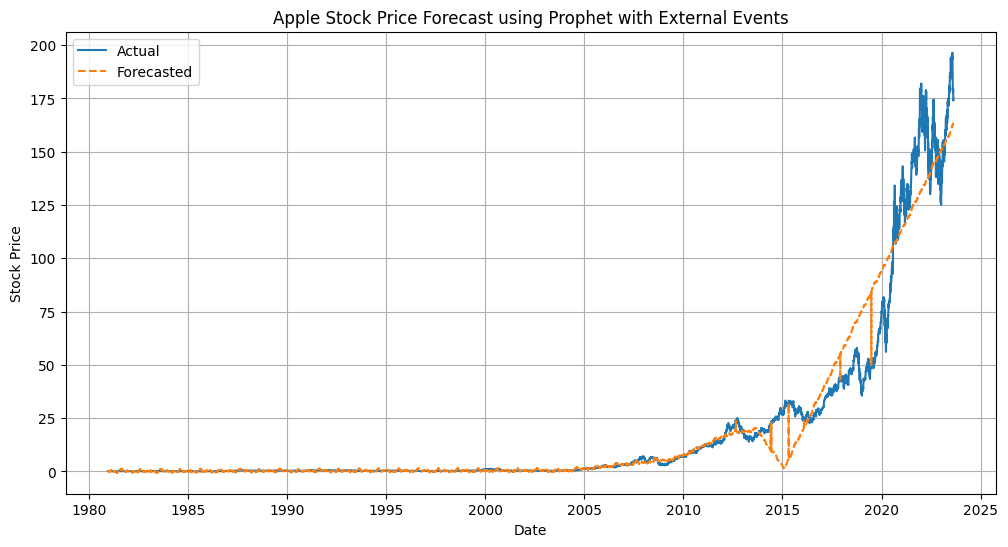

In [79]:
# Purpose: Predict Apple stock price using Prophet with external events

plt.figure(figsize=(12, 6))
plt.plot(apple_data["Date"], apple_data["Close"], label="Actual")
plt.plot(apple_data["Date"], forecast["yhat"], label="Forecasted", linestyle="--")
plt.legend()
plt.title("Apple Stock Price Forecast using Prophet with External Events")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


6. Stock Investment Prediction

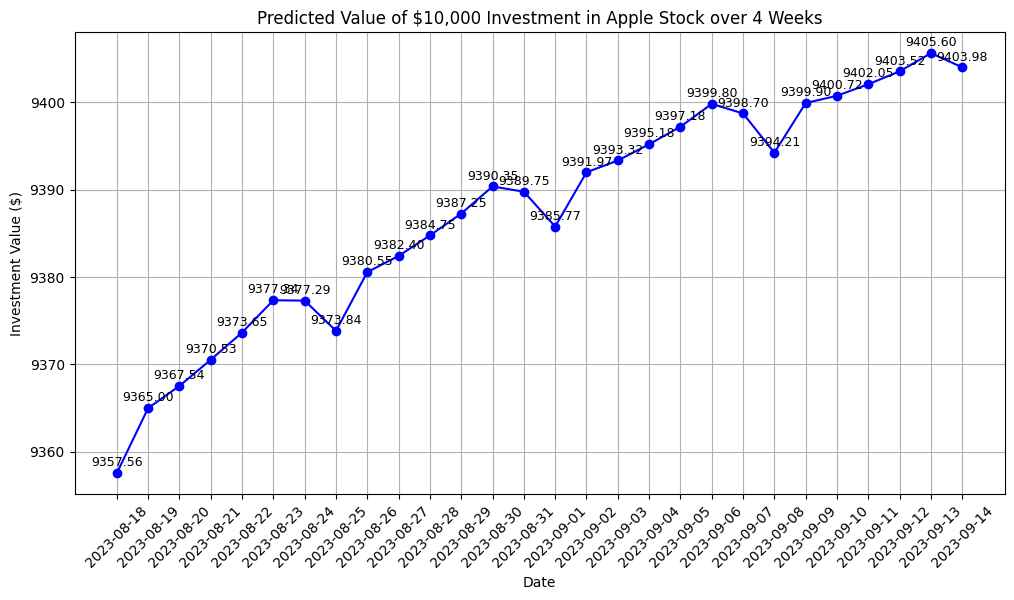

In [85]:
# Create a future dataframe for 28 days beyond the existing data
future_dates = model.make_future_dataframe(periods=28)
for event in all_events:
    future_dates[event] = 0  # Assuming no significant events in the forecasted period

# Predict with the model
forecast = model.predict(future_dates)

# Get the starting price (last known actual price)
starting_price = apple_data.iloc[-1]['Close']

# Calculate the relative change in stock price for each forecasted day
relative_change = forecast['yhat'].tail(28) / starting_price

# Calculate the predicted value of the investment for each day
investment_values = 10000 * relative_change

# Plot the predicted investment value over the 4-week period
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(forecast['ds'].tail(28), investment_values, marker='o', linestyle='-', color='blue', label='Predicted Investment Value')

# Annotating each marker with the actual price
for i, j in zip(forecast['ds'].tail(28), investment_values):
    plt.annotate(f"{j:.2f}", (i, j), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.title('Predicted Value of $10,000 Investment in Apple Stock over 4 Weeks')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.xticks(forecast['ds'].tail(28), rotation=45, ha='center')
plt.grid(True)
plt.tight_layout    
plt.show()
